<IPython.core.display.Javascript object>


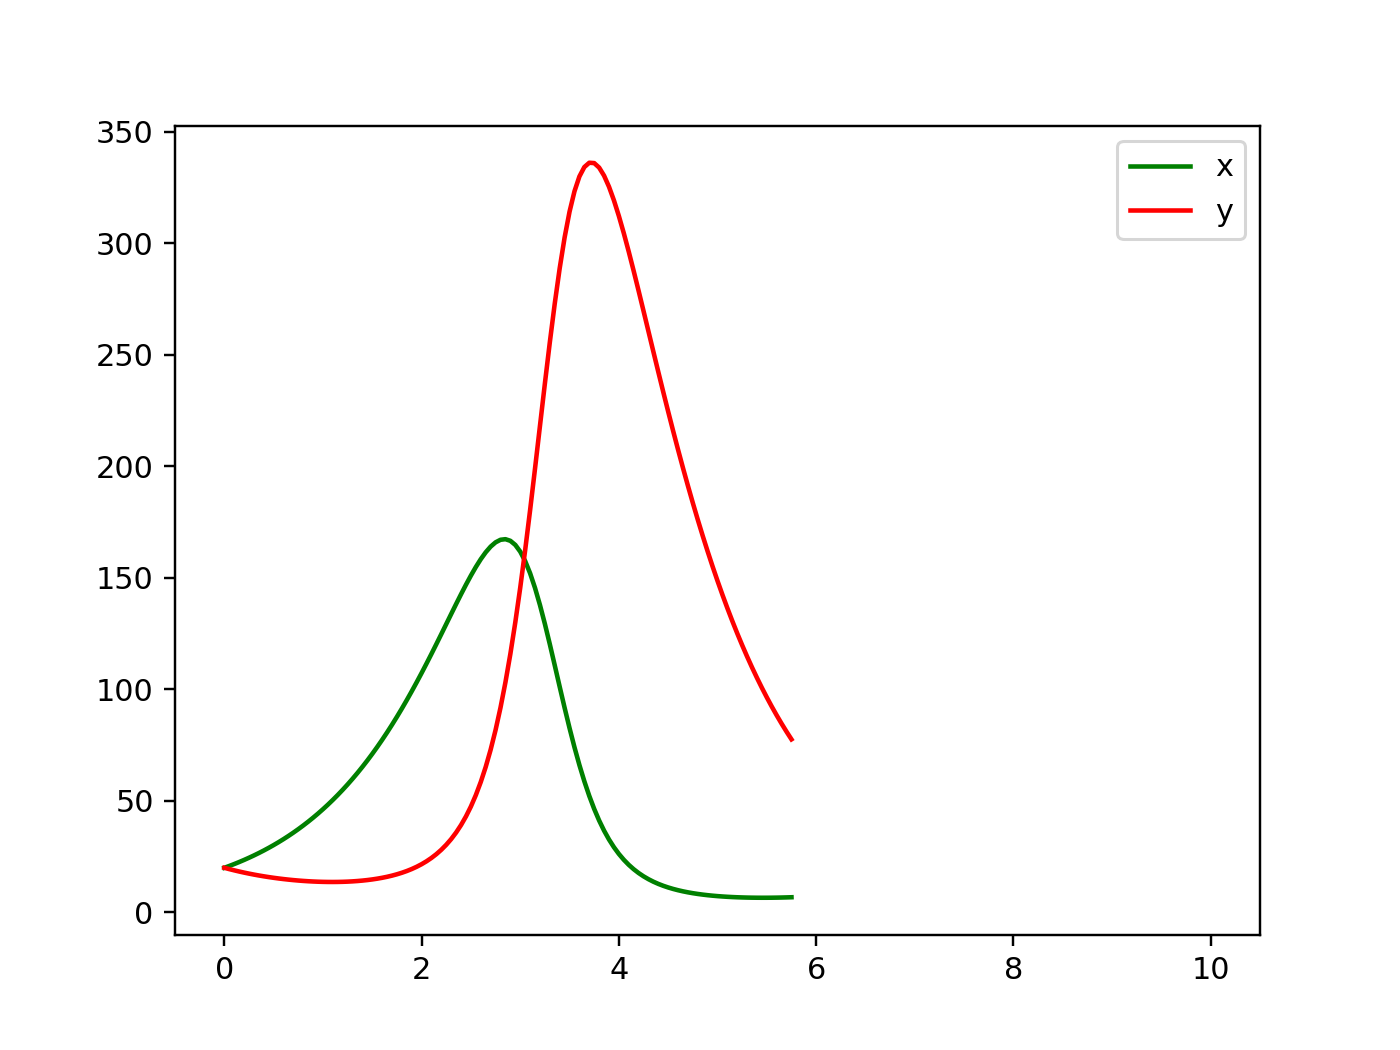

In [2]:
# Jupyter上でアニメーション実行のために必要
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# アニメーション関連の宣言
fig = plt.figure()
ims = []

# Lotka-Volterra方程式に必要な正定数の宣言
a = 1
b = 0.01
c = 0.02
d = 1

# xとyの初期値
x0 = 20
y0 = 20

# オイラー法の時間幅は1/200とする
nt = 200
dt = 1/nt

MAXT = 10           # 時間の最大値
MAX_STEP = MAXT * nt # ステップの最大値

# 変数x, yはステップ s におけるx, yの値を保持し，毎ステップ更新する
s = 0
x = x0
y = y0

# プロットに使うxとyの値を保持するリスト
x_list = [x0]
y_list = [y0]

# 時刻t=0のプロット
im_x = plt.plot([0], x_list, c="green", label='x')
im_y = plt.plot([0], y_list, c="red", label='y')
ims.append(im_x + im_y)

for i in range(MAX_STEP+1):
    # オイラー法の実施
    x_ = x + (a*x - b*x*y)*dt
    y_ = y + (c*x*y - d*y)*dt
    x = x_
    y = y_
    s += 1

    # 10回に1度プロット
    if s%10 == 0:
        # 現在のx,yをプロット用リストに追加
        x_list.append(x)
        y_list.append(y)

        t_array = np.arange(0, (s+1)/nt, dt*10) # 横軸用の配列
        
        # t=0から現在までをプロットし, アニメーションに登録
        im_x = plt.plot(t_array, x_list, c="green")
        im_y = plt.plot(t_array, y_list, c="red")
        ims.append(im_x + im_y)

plt.legend()  # 凡例の表示
ani = animation.ArtistAnimation(fig, ims, interval=10)  # アニメの作成
plt.show()